## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [35]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import sqlite3

In [36]:
conn = sqlite3.connect('C:/Users/Virginia/Desktop/dsc-phase-1-project-v2-4/zippedData/im.db')
q1 = """ 
SELECT * 
FROM movie_basics
""" 

q2 = """ 
SELECT * 
FROM movie_ratings
""" 
movie_basics = pd.read_sql(q1, conn)
movie_ratings = pd.read_sql(q2, conn)

In [37]:
movies_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t')
movie_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding='cp1252')

In [38]:
movie_basics.info()
movie_basics.isnull().sum()
movie_basics.duplicated().sum()
movie_basics.dropna(subset=['genres'], inplace=True)
movie_basics.drop(columns=['original_title', 'primary_title'], axis=1, inplace=True)
median_runtime = movie_basics['runtime_minutes'].median()
movie_basics['runtime_minutes'].fillna(median_runtime, inplace=True)
movie_basics['genres'] = movie_basics['genres'].str.strip()
movie_basics['start_year'] = pd.to_datetime(movie_basics['start_year'], format='%Y')
movie_basics = movie_basics.rename(columns={'runtime_minutes': 'runtime' })

movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   movie_id    140736 non-null  object        
 1   start_year  140736 non-null  datetime64[ns]
 2   runtime     140736 non-null  float64       
 3   genres      140736 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)

In [39]:
movie_ratings.head()
movie_ratings.info()

movie_ratings.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


0

In [40]:
# display first 5 rows
movies_df.head()
# overview of the data using the .info()
movies_df.info()
# check how many missing values in each column
movies_df.isnull().sum()
# rename title column 
movies_df = movies_df.rename(columns={'title': 'movie_title' })
# drop original_title column
movies_df.drop(columns=['original_title', 'genre_ids', 'original_language', 'vote_average', 'vote_count'], inplace=True)
# convert release date column to Panda time series object
movies_df["release_date"] = movies_df["release_date"].apply(pd.to_datetime)
# check how many duplicates
print(movies_df.duplicated().sum())
# drop duplicates
movies_df.drop_duplicates(inplace=True)
# confirm changes by checking overview of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
1020
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            25497 non-null  int64         
 1   popularity    25497 non-null  floa

In [41]:
# display first 5 rows
movie_budgets_df.head()
# overview of the dataset
movie_budgets_df.info()
# rename movie column
movie_budgets_df = movie_budgets_df.rename(columns={'movie': 'movie_title' })
# check for duplicates
print(movie_budgets_df.duplicated().sum()) #This checks for duplicated values
# convert release date column to appropriate datatype
movie_budgets_df["release_date"] = movie_budgets_df["release_date"].apply(pd.to_datetime)
# remove dollar sign, replace with comma and convert into correct datatypes
movie_budgets_df["production_budget"] = movie_budgets_df["production_budget"].map(lambda x: float(x.replace(",", "").replace("$", "")))
movie_budgets_df["domestic_gross"] = movie_budgets_df["domestic_gross"].map(lambda x: float(x.replace(",", "").replace("$", "")))
movie_budgets_df["worldwide_gross"] = movie_budgets_df["worldwide_gross"].map(lambda x: float(x.replace(",", "").replace("$", "")))
# check to see if there are any changes made
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie_title        5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64

In [42]:
# displays first 5 rows
movie_gross_df.head()
# overview of the dataset
movie_gross_df.info()
# check for Duplicates
print(movie_gross_df.duplicated().sum()) 
# check for missing values
movie_gross_df.isnull().sum()
# rename title column
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie_title' })
# fill missing values in the studio column with 'Unknown'
movie_gross_df['studio'].fillna('Unknown', inplace=True)
# replace NaN with 0
movie_gross_df['foreign_gross'].fillna(0, inplace=True)
# fill missing values with median
movie_gross_df['foreign_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)
movie_gross_df['domestic_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)
# overview of the dataset to confirm changes
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [43]:
# displays first 5 rows
movie_info_df.head()
# overview of the dataset
movie_info_df.info()
movie_info_df.isnull().sum()
# check for duplicated values
print(movie_info_df.duplicated().sum())
# drop original_title column
movie_info_df.drop(columns=['synopsis', 'rating', 'genre', 'writer', 'theater_date', 'dvd_date', 'director'], inplace=True)

movie_info_df.dropna(subset=['studio'], inplace=True)

# fill box_office missing valus with 0
movie_info_df['box_office'].fillna(0, inplace=True)
# remove commas and return as float type
movie_info_df['box_office'].str.replace(',', '').astype(float)
# replace string minutes with empty strings
movie_info_df['runtime'].replace('minutes', '', regex=True, inplace=True)
# convert runtime column to float type
movie_info_df['runtime'] = movie_info_df['runtime'].astype('float64')
# fill misiing values with median
movie_info_df['runtime'].fillna(movie_info_df.runtime.median(), inplace=True)
# overview of the dataset, affirm changes
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 1 to 1559
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          494 non-null    int64  
 1   currency    305 n

In [44]:
# displays first 5 rows
movie_reviews_df.head()
# overview of the data
movie_reviews_df.info()
# check for null values
print(movie_reviews_df.isnull().sum())
# check for duplicated values
movie_reviews_df.duplicated().sum()
# remove duplicates
movie_reviews_df.drop_duplicates(inplace=True)
# fill missing values in review, rating, critic, publisher columns with 'Unknown'
movie_reviews_df['review'].fillna('Unknown', inplace=True)
movie_reviews_df['rating'].fillna('Unknown', inplace=True)
#movie_reviews_df['critic'].fillna('Unknown', inplace=True)
movie_reviews_df['publisher'].fillna('Unknown', inplace=True)
# drop rows with missing values
movie_reviews_df.dropna(inplace=True)
# convert date to correct datatype
movie_reviews_df['date'] = pd.to_datetime(movie_reviews_df['date'])
# overview of the data for confirmation
movie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51710 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          51710 non-null  int64         
 1   review      

In [45]:
# merge movie gross dataframe with movie budgets dataframe
movie_gross_budgets_df = pd.merge(movie_budgets_df, movie_gross_df, on='movie_title')
# merge movie gross_budgets dataframe with movie info dataframe
movie_info_gross_budgets_df = pd.merge(movie_gross_budgets_df, movie_info_df, on='studio')
# merge movie info gross budgets with movies dataframe
merged_movies_info_gross_df = pd.merge(movie_info_gross_budgets_df, movies_df, on='release_date')
# merge movie info gross budgets with movie basics dataframe
merged_basics = pd.merge(merged_movies_info_gross_df, movie_basics, on='runtime')
# merge merged_basics with movie ratings dataframe
box_office_df = pd.merge(merged_basics, movie_ratings, on='movie_id')


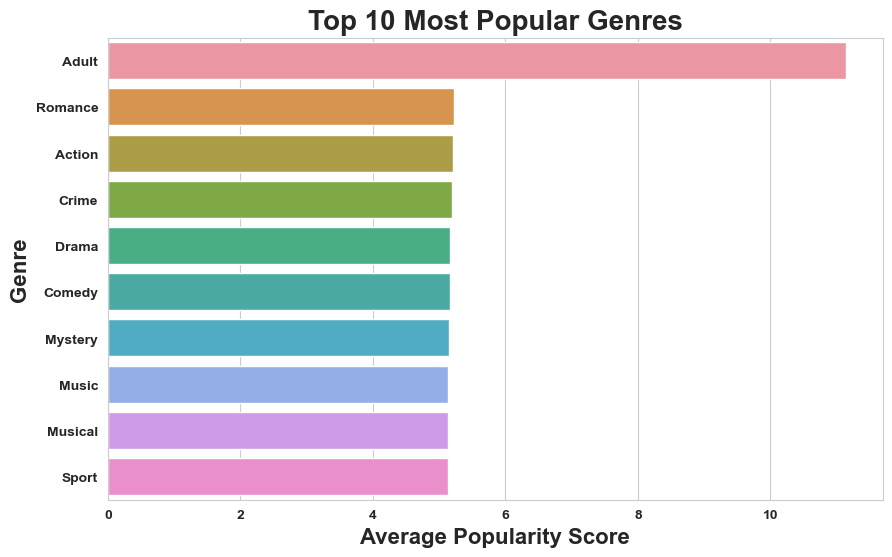

In [46]:
# create a horizontal bar chart showing the average popularity score for each genre.
box_office_df['all_genres'] = box_office_df['genres'].str.split(',')
genre_popularity_df = box_office_df[['popularity', 'all_genres']]

# Separate the genres from the list column and explode them
popularity_df = genre_popularity_df.explode('all_genres')

# Group by genre and calculate the mean popularity score
popularity_by_genre = popularity_df.groupby('all_genres')['popularity'].mean().reset_index()

# Sort the data by popularity score in descending order
popularity_by_genre = popularity_by_genre.sort_values(by='popularity', ascending=False)[:10]

# Create the horizontal bar chart using Seaborn's barplot function
sns.set_palette("flare")
sns.set_style('whitegrid')
# Create a horizontal bar plot of the top 10 most popular genres
plt.figure(figsize=(10, 6)) # set the size of the figure
sns.barplot(x='popularity', y='all_genres', data=popularity_by_genre, )

# Add labels and title
plt.xlabel('Average Popularity Score', fontweight='bold', fontsize=16)
plt.ylabel('Genre', fontweight='bold', fontsize=16)
# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")    
plt.title('Top 10 Most Popular Genres', fontweight='bold', fontsize=20)
plt.show() 

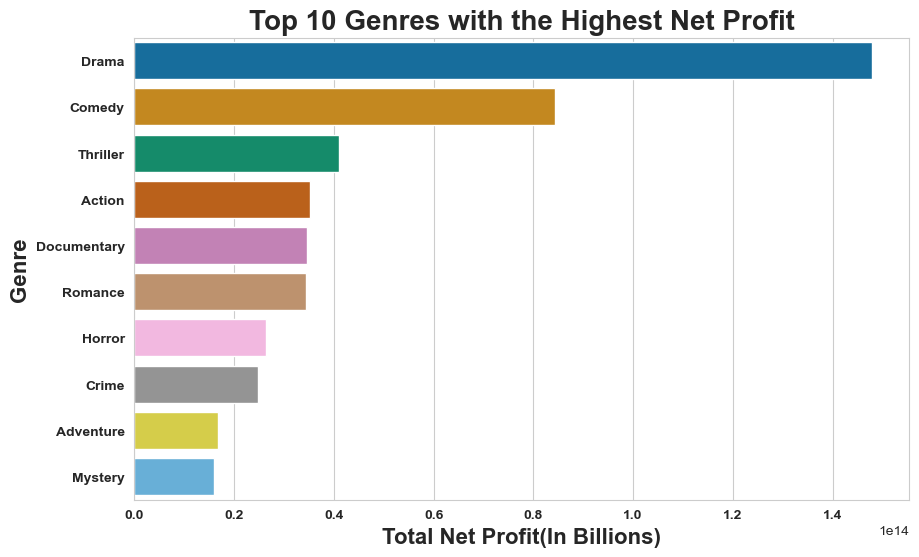

In [47]:
# Calculate net profit
box_office_df['net_profit'] = box_office_df['worldwide_gross'] - box_office_df['production_budget']

# Split genres and explode
box_office_df['all_genres'] = box_office_df['genres'].str.split(',')
profit_df = box_office_df.explode('all_genres')

# Group by genre and calculate net profit
profit_by_genre = profit_df.groupby('all_genres')['net_profit'].sum().reset_index()

# Sort by net profit in descending order
profit_by_genre = profit_by_genre.sort_values(by='net_profit', ascending=False)[:10]

# Create horizontal bar chart
sns.set_style('whitegrid')
sns.set_palette('colorblind')
plt.figure(figsize=(10, 6))
sns.barplot(x='net_profit', y='all_genres', data=profit_by_genre)
# Add labels and title
plt.xlabel('Total Net Profit(In Billions)', fontweight='bold', fontsize=16)
plt.ylabel('Genre', fontweight='bold', fontsize=16)

# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)
   
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)  

plt.title('Top 10 Genres with the Highest Net Profit', fontweight='bold', fontsize=20)
plt.show()

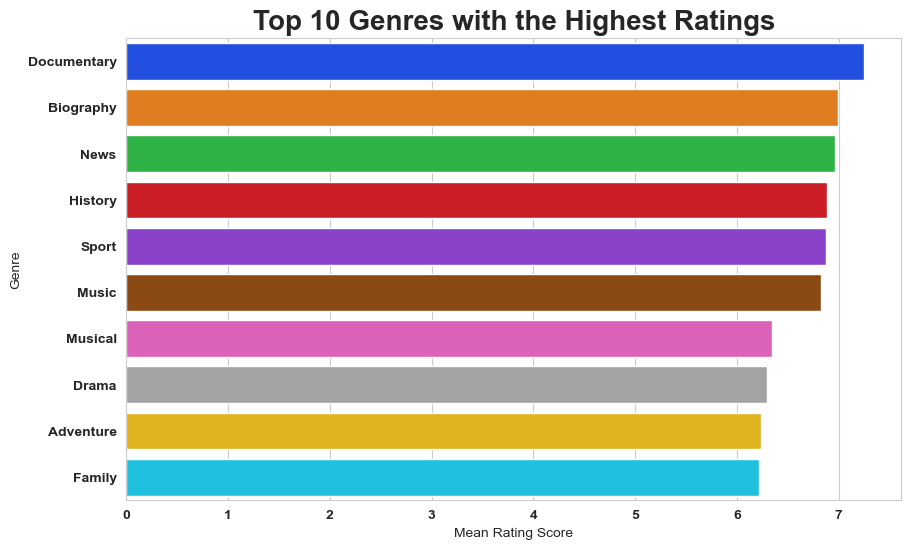

In [48]:
#box_office_df['all_genres'] = box_office_df['genres'].str.split(',')
genre_rating_df = box_office_df[['averagerating', 'all_genres']]

#Separate the genres from the list column and explode them
rating_df = genre_rating_df.explode('all_genres')

#Group by genre and calculate the mean rating score
rating_by_genre = rating_df.groupby('all_genres')['averagerating'].mean().reset_index()

#Sort the data by rating score in descending order
rating_by_genre = rating_by_genre.sort_values(by='averagerating', ascending=False)[:10]

#Create the horizontal bar chart using Seaborn's barplot function
sns.set_style('whitegrid')
sns.set_palette('bright')
#Create a horizontal bar plot of the top 10 highest rated genres
plt.figure(figsize=(10, 6)) # set the size of the figure
sns.barplot(x='averagerating', y='all_genres', data=rating_by_genre)
#Add labels and title
plt.xlabel('Average Rating Score')
plt.ylabel('Genre')

# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)
   
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)

plt.title('Top 10 Genres with the Highest Ratings', fontweight='bold', fontsize=20)
plt.show()      




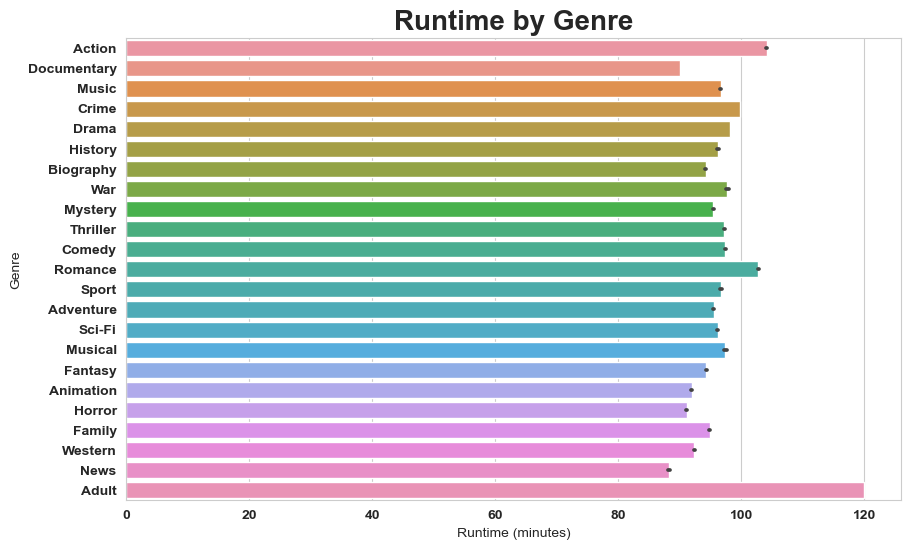

In [50]:
# create a new dataframe with columns 'runtime' and 'all_genres'
genre_runtime_df = box_office_df[['runtime', 'all_genres']]

# explode the genres into separate rows
genre_runtime_df = genre_runtime_df.explode('all_genres')

# group by genre and calculate the mean runtime
runtime_by_genre = genre_runtime_df.groupby('all_genres')['runtime'].mean().reset_index()

# sort by mean runtime in ascending order
runtime_by_genre = runtime_by_genre.sort_values(by='runtime', ascending=True)[:10]

# create a bar plot of runtime by genre using Seaborn's barplot function
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.figure(figsize=(10, 6)) # set the size of the figure
sns.barplot(x='runtime', y='all_genres', data=genre_runtime_df)

# add labels and title
plt.xlabel('Runtime (minutes)')
plt.ylabel('Genre')

# get the x tick labels
xtick_labels = plt.gca().get_xticklabels()

# set the font weight and size of each tick label
for label in xtick_labels:
    label.set_weight('bold')
    label.set_fontsize(10)

# set the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# set the font weight and size of each tick label
for label in ytick_labels:
    label.set_weight('bold')
    label.set_fontsize(10)

plt.title('Runtime by Genre', fontweight='bold', fontsize=20)
plt.show()

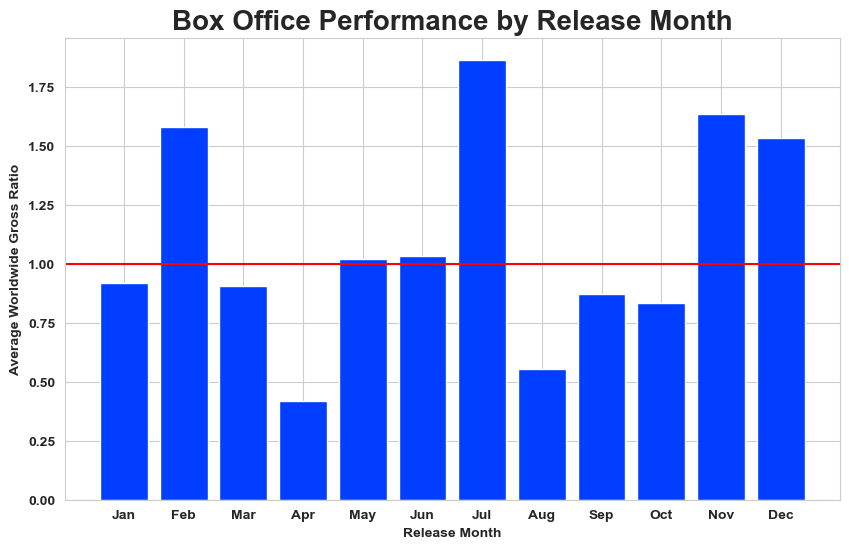

In [52]:
# Group the movies by release month
box_office_df['release_month'] = box_office_df['release_date'].dt.month
box_office_df_by_month = box_office_df.groupby('release_month')

# Calculate total and average gross for each release month group
total_gross_by_month = box_office_df_by_month['worldwide_gross'].sum()
average_gross_by_month = box_office_df_by_month['worldwide_gross'].mean()

# Calculate overall average gross for all movies in the dataset
overall_average_gross = box_office_df['worldwide_gross'].mean()

# Compare average gross for each release month group to overall average
average_gross_by_month_ratio = average_gross_by_month / overall_average_gross

# Visualize the data using a bar chart
# set the size of the figure
plt.figure(figsize=(10, 6)) 
plt.bar(average_gross_by_month_ratio.index, average_gross_by_month_ratio)
plt.axhline(y=1, color='r', linestyle='-')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Release Month', fontweight='bold', fontsize=10)
plt.ylabel('Average Worldwide Gross Ratio', fontweight='bold', fontsize=10)

# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")
    
plt.title('Box Office Performance by Release Month', fontweight='bold', fontsize=20)
plt.show()